# Clustering

# 2. K-means vs Gaussian Mixture

In this lab, you will compare K-means and the Gaussian Mixture Model (GMM) on the [Iris dataset](https://fr.wikipedia.org/wiki/Iris_de_Fisher). Feel free to use any dataset of your choice.

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [3]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
from sklearn.metrics.cluster import contingency_matrix

## Data

In [4]:
iris = datasets.load_iris()
X = iris.data  
y = iris.target
feature_names = iris.feature_names
label_names = iris.target_names

In [5]:
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
print(label_names)

['setosa' 'versicolor' 'virginica']


In [7]:
def show_data(X, y, features=[0, 1], feature_names=feature_names):
    '''Display the samples in 2D'''
    plt.figure(figsize=(5,5))
    for label in set(y):
        plt.scatter(X[y == label, features[0]], X[y == label, features[1]])
    plt.xlabel(feature_names[features[0]])
    plt.ylabel(feature_names[features[1]])
    plt.show()

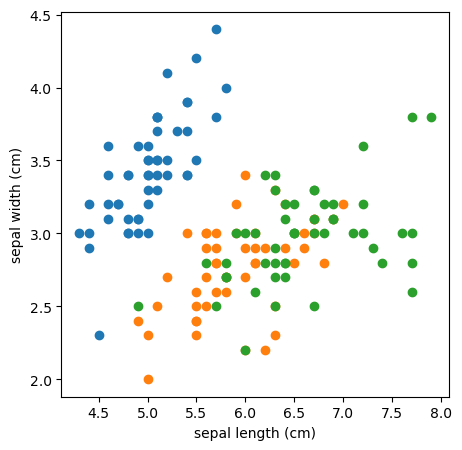

In [8]:
show_data(X, y, [0, 1])

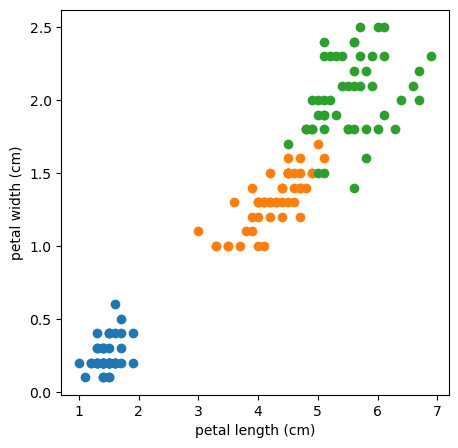

In [9]:
show_data(X, y, [2, 3])

## K-means

We first apply k-means and display the clusters.

In [10]:
n_clusters = 3
km = KMeans(n_clusters, n_init=10)
labels = km.fit_predict(X)

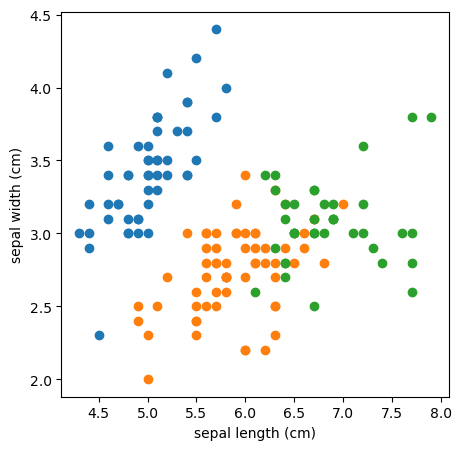

In [11]:
show_data(X, labels, [0, 1])

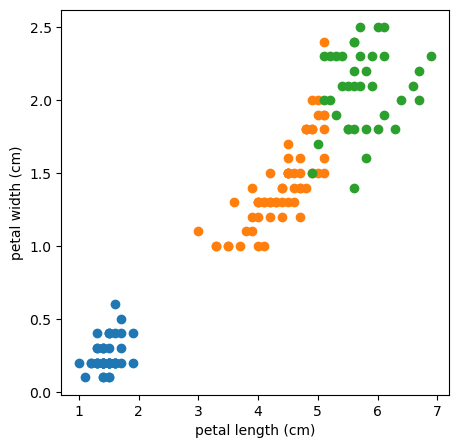

In [12]:
show_data(X, labels, [2, 3])

## Gaussian Mixture Model

We now compare with the Gaussian Mixture Model.

In [13]:
gm = GaussianMixture(n_clusters)
labels_ = gm.fit_predict(X)

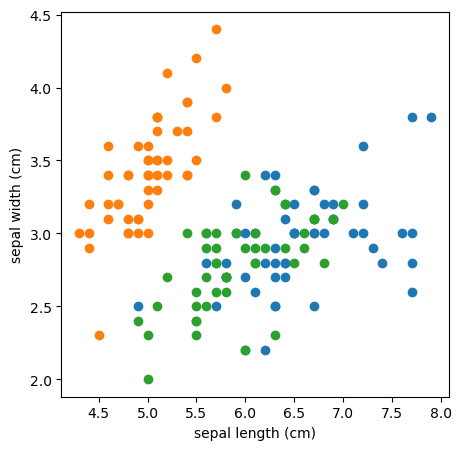

In [14]:
show_data(X, labels_, [0, 1])

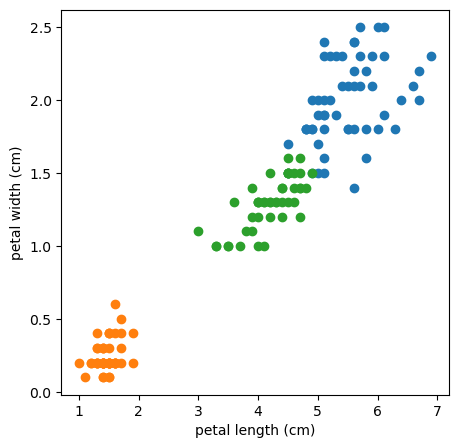

In [15]:
show_data(X, labels_, [2, 3])

## To do

* Display the contigency matrix for each clustering. Which one looks better?
* Confirm your guess using the ARI and AMI scores.
* Check that the optimal number of clusters is 3.
* Is it possible to guess the optimal number of clusters with the silhouette scores?<br>
Interpret the results.

In [16]:
# Display the contigency matrix for each clustering.
print(contingency_matrix(y, labels))
print(contingency_matrix(y, labels_))

[[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]
[[ 0 50  0]
 [ 5  0 45]
 [50  0  0]]


In [17]:
# Which one looks better? looks better?
# The first one, because the diagonal is more populated.

In [18]:
# Confirm your guess using the ARI and AMI scores.
print(adjusted_rand_score(y, labels))
print(adjusted_mutual_info_score(y, labels))

print(adjusted_rand_score(y, labels_))
print(adjusted_mutual_info_score(y, labels_))

0.7302382722834697
0.7551191675800484
0.9038742317748124
0.8984361033676299


In [19]:
# Check that the optimal number of clusters is 3.
n_clusters = 3
km = KMeans(n_clusters, n_init=10)
labels = km.fit_predict(X)
print(adjusted_rand_score(y, labels))
print(adjusted_mutual_info_score(y, labels))

# Check that the optimal number of clusters is 3.
n_clusters = 3
gm = GaussianMixture(n_clusters)
labels_ = gm.fit_predict(X)
print(adjusted_rand_score(y, labels_))
print(adjusted_mutual_info_score(y, labels_))

0.7302382722834697
0.7551191675800484
0.9038742317748124
0.8984361033676299


In [22]:
# Is it possible to guess the optimal number of clusters with the silhouette scores?
print(silhouette_score(X, labels))
print(silhouette_score(X, labels_))

# Is it possible to guess the optimal number of clusters with the silhouette scores?
# No, because the silhouette score is not a good measure for the optimal number of clusters.

0.5528190123564095
0.5011761635067206


In [25]:
# Interpret the results.
# The ARI and AMI scores are higher for the GaussianMixture clustering, so it is better.

## Variants

Some constraints can be added on the covariance matrices so as to make the model simpler and less prone to overfitting.

In [26]:
gm = GaussianMixture(n_clusters, covariance_type='spherical')

## To do 

* Test the various types of covariance matrices and interpret the results.
* Redo the experiments with a scaling factor of 10 on ones of the 4 components and interpret the results.

In [27]:
X_scale = X.copy()
X_scale[:, 0] *= 10

In [30]:
# Test the various types of covariance matrices.

# create a function to test the various types of covariance matrices.
def test_covariance_types(X, y, n_clusters):
    '''Test the various types of covariance matrices.'''
    for covariance_type in ['spherical', 'tied', 'diag', 'full']:
        gm = GaussianMixture(n_clusters, covariance_type=covariance_type)
        labels = gm.fit_predict(X)
        print(covariance_type)
        print(adjusted_rand_score(y, labels))
        print(adjusted_mutual_info_score(y, labels))

test_covariance_types(X_scale, y, n_clusters)


spherical
0.446343307796427
0.43483971075538674
tied
0.8856970310281228
0.8624853568628785
diag
0.7591987071071522
0.8032287370935435
full
0.9038742317748124
0.8984361033676299


In [29]:
# Interpret the results.
# The best covariance type is tied.